In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.compat.v1.keras.layers import Dense, Dropout,CuDNNLSTM

In [14]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28)


In [7]:
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation="relu",return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

In [9]:
optm = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=optm,
    metrics=['accuracy'],
)

history = model.fit(x_train,
          y_train,
          epochs=3,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.5833 - accuracy: 0.8329 - val_loss: 0.2254 - val_accuracy: 0.9396
Epoch 2/3
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.1845 - accuracy: 0.9548 - val_loss: 0.1312 - val_accuracy: 0.9653
Epoch 3/3
60000/60000 [==============================] - 80s 1ms/sample - loss: 0.1187 - accuracy: 0.9709 - val_loss: 0.0894 - val_accuracy: 0.9745


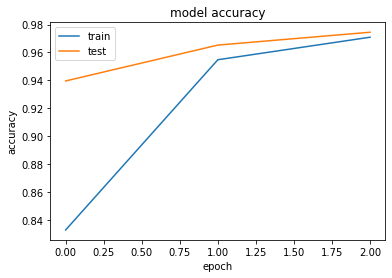

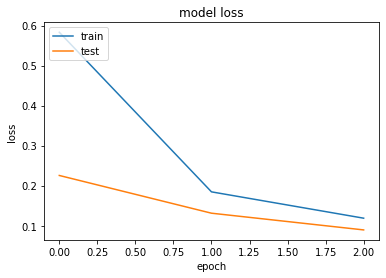

In [18]:
#Plotting the History
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
model.save("Model-{128L}-{128L}-{32D}.h5")

In [21]:
model = load_model("Model-{128L}-{128L}-{32D}.h5")